In [83]:
%pip install albumentations opencv-python pillow matplotlib Pillow

Note: you may need to restart the kernel to use updated packages.


## Imports

In [84]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations import Compose, Rotate, ShiftScaleRotate, Affine, RandomBrightnessContrast, RGBShift, ChannelShuffle

plt.style.use('dark_background')

## Load and display Image

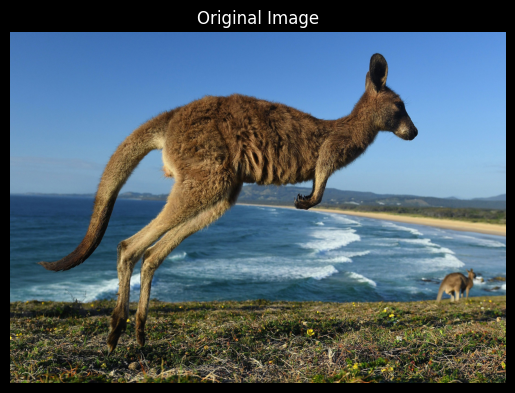

In [85]:
def show(image, title="Augmented Image"):
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.savefig(f"{title}.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()

# Load image using PIL and convert to RGB
image = np.array(Image.open("sample_image.jpg").convert("RGB"))

# Display original
show(image, "Original Image")

## Grayscale

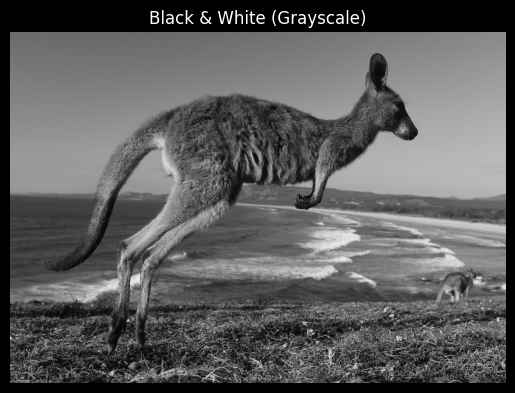

In [86]:
# Define the transformation to convert to grayscale (black & white)
gray_augment = A.Compose([
    A.ToGray(p=1.0)  # Convert the image to grayscale with 100% probability
])

# Apply the grayscale transformation
gray_image = gray_augment(image=image)["image"]

# Show the black and white image
show(gray_image, "Black & White (Grayscale)")

## Horizontal and Vertical Flips

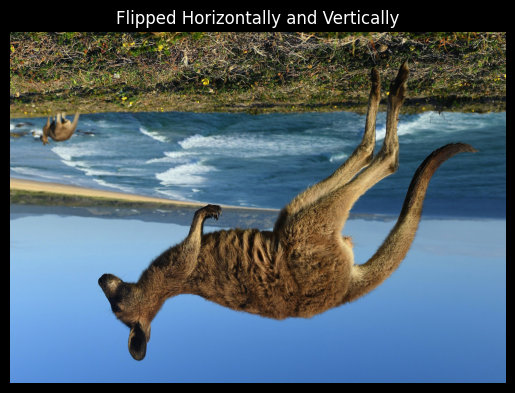

In [87]:
transform = A.Compose([
    A.HorizontalFlip(p=1.0),
    A.VerticalFlip(p=1.0)
])

augmented = transform(image=image)["image"]
show(augmented, "Flipped Horizontally and Vertically")

## Rotation

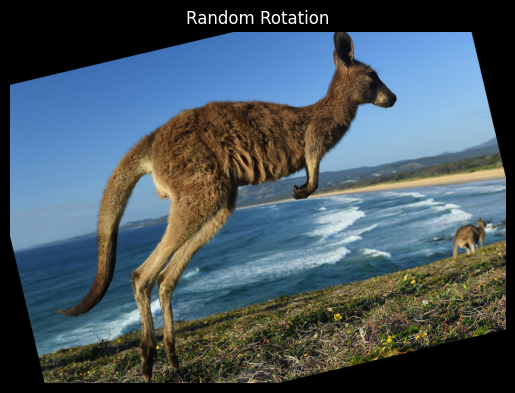

In [88]:
# Apply a random rotation
rotation_augment = Compose([
    Rotate(limit=(-45, 45), p=1.0)  # Rotate by a random angle between -45 to 45 degrees
])

rotated_image = rotation_augment(image=image)["image"]
show(rotated_image, "Random Rotation")

## Translation

c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\projects\ebook_object_detection\.venv\lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


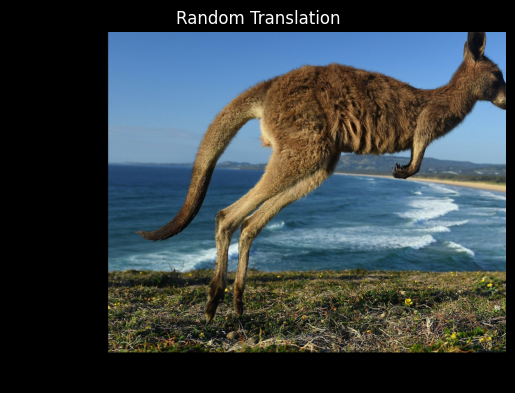

In [89]:
# Apply random translation (shifting)
shift_augment = Compose([
    ShiftScaleRotate(shift_limit=0.3, scale_limit=0, rotate_limit=0, p=1.0)  # Translation only
])

shifted_image = shift_augment(image=image)["image"]
show(shifted_image, "Random Translation")

## Shearing

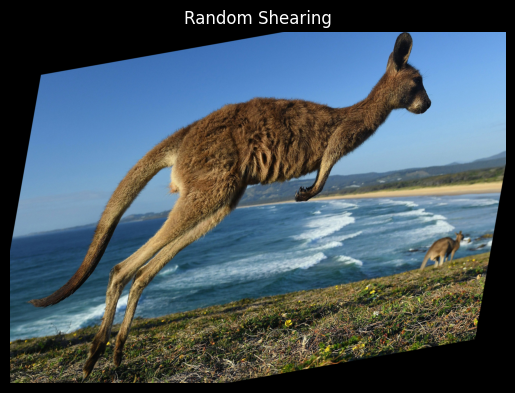

In [90]:
# Apply random shearing
shear_augment = Compose([
    Affine(shear=10, p=1.0)  # Apply shear with a factor of 10 degrees
])

sheared_image = shear_augment(image=image)["image"]
show(sheared_image, "Random Shearing")

## Brightness Adjustment

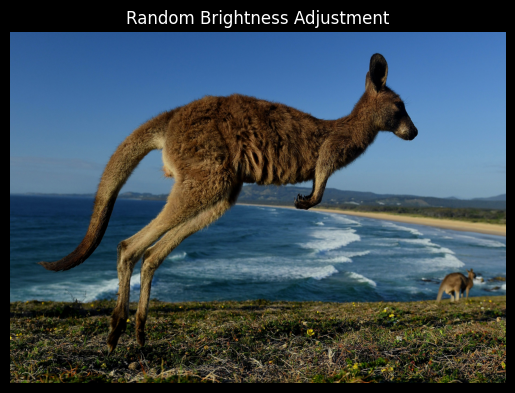

In [91]:
# Apply random brightness adjustment
brightness_augment = Compose([
    RandomBrightnessContrast(brightness_limit=0.3, p=1.0)  # Random brightness adjustment
])

brightness_image = brightness_augment(image=image)["image"]
show(brightness_image, "Random Brightness Adjustment")

## Contrast Adjustment

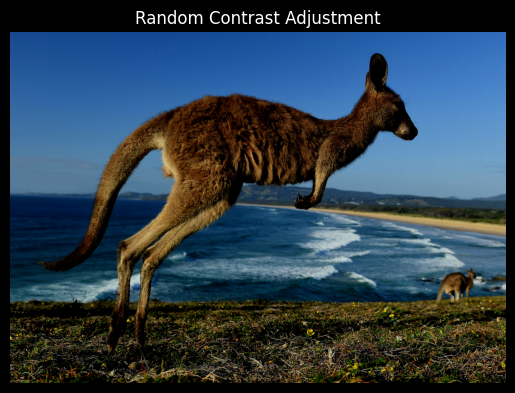

In [92]:
# Apply random contrast adjustment
contrast_augment = Compose([
    RandomBrightnessContrast(contrast_limit=0.3, p=1.0)  # Random contrast adjustment
])

contrast_image = contrast_augment(image=image)["image"]
show(contrast_image, "Random Contrast Adjustment")

## RGB Shift

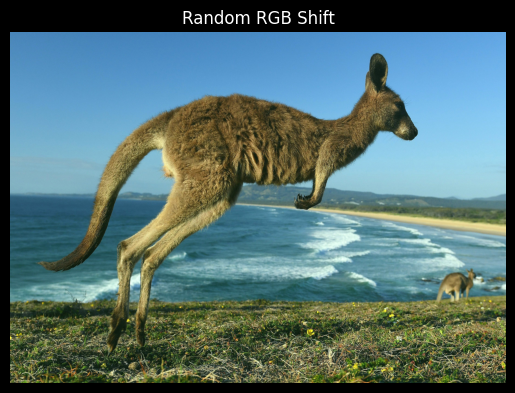

In [93]:
# Apply RGB shift
rgb_shift_augment = Compose([
    RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1.0)  # Shift each channel by a random amount
])

rgb_shifted_image = rgb_shift_augment(image=image)["image"]
show(rgb_shifted_image, "Random RGB Shift")

## Channel Shuffle

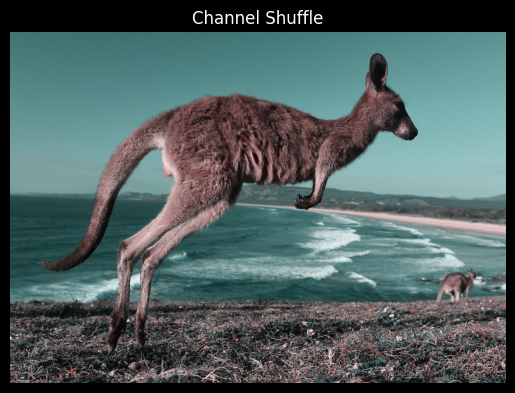

In [94]:
# Apply Channel Shuffle
channel_shuffle_augment = Compose([
    ChannelShuffle(p=1.0)  # Shuffle the RGB channels
])

channel_shuffled_image = channel_shuffle_augment(image=image)["image"]
show(channel_shuffled_image, "Channel Shuffle")

## Gaussian Noise & Blur

C:\Users\Brian\AppData\Local\Temp\ipykernel_12004\361725941.py:2: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),


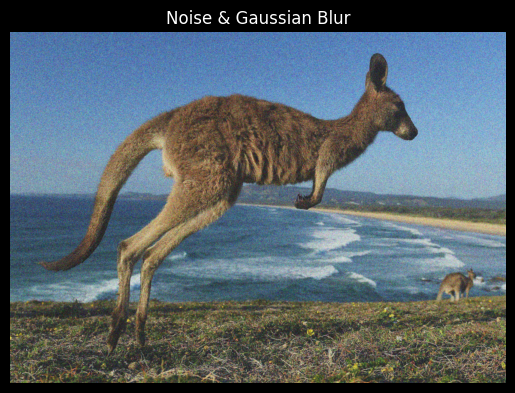

In [95]:
transform = A.Compose([
    A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
    A.GaussianBlur(blur_limit=(3, 7), p=1.0)
])

augmented = transform(image=image)["image"]
show(augmented, "Noise & Gaussian Blur")

## Cutout (Coarse Dropout)

C:\Users\Brian\AppData\Local\Temp\ipykernel_12004\766637705.py:2: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=32, max_width=32,


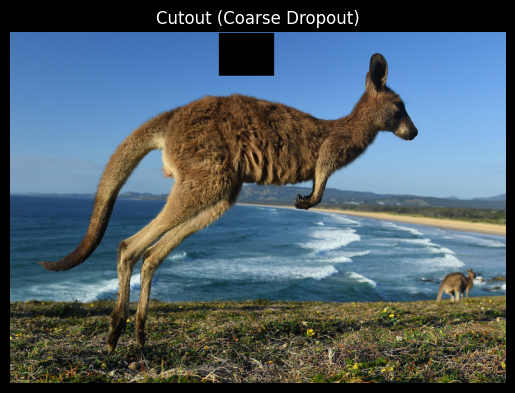

In [96]:
transform = A.Compose([
    A.CoarseDropout(max_holes=8, max_height=32, max_width=32,
                    fill_value=0, p=1.0)
])

augmented = transform(image=image)["image"]
show(augmented, "Cutout (Coarse Dropout)")

## Histogram Equalization (CLAHE)

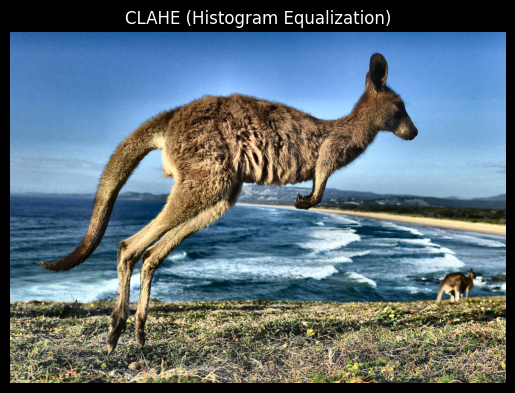

In [97]:
transform = A.Compose([
    A.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1.0)
])

augmented = transform(image=image)["image"]
show(augmented, "CLAHE (Histogram Equalization)")